# Module 5 Challenge 

## Analysis

* As shown in Figure 1, the mice that were treated with Capolumlin had the most survival rate compared to the mice treated with the other eight treatments that were used. 

* As shown on Table 2, after Ramicane, Capomulin has the seond lowest tumor volume median. 

* The survial rate of Ramicane follows Capomulin. The effectiveness of the tumor volume decrease when the study was done.

* As shown in Table 3, the final tumor volume measurements of mice that were treated with Capomulin and Ramicane show that two of the mice out of twenty-five that were treated with Capomulin had an increase in the tumor volume.

* As shown in table 4, twenty-five mice that where treated with Ramicane had a decrease in the tumor volume.

* The relationship between body weight and the average tumor volume in the mices that were treated with Capomulin displayed that the tumor volume relates to the wight of the mice that has a tumor.

* Mice treated with Capomulin show an improvement over the time of the study and had the second effective results after the Ramicane.

* As shown in Figure 2, the mice population that was used in the study had 50.2% of male as opposed to the 49.8% female mice.

* Between the female and male mices there were an increase and decrease based on the treatment that was used.

* Further study may be done to have more of an analysis of the effectiveness of Ramicane and Capomulin.

## The Study Results of the Mouse MetaData

In [1]:
# Dependencies:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
from scipy import stats
import numpy as np
%matplotlib inline

In [2]:
# Reading the mouse data and the study results:
Mouse_metadata=pd.read_csv("Pymaceuticals/data/Mouse_metadata.csv")
#mouse_metadata
study_results=pd.read_csv("Pymaceuticals/data/Study_results.csv")
#study_results

# Combining the data into a single dataset:
drug_regimen_results=pd.merge(Mouse_metadata, study_results, on="Mouse ID")
drr=drug_regimen_results
#drr.head()

# Renaming the 'Age_months' column:
drr=drr.rename(columns={"Age_months":"Age (months)"})
drr.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


**Table 1**

## Testing the Dataset

In [3]:
# Get column data types:
#drr.dtypes

# Checking for missing values:
#drr.isnull().sum()

# Identify incomplete rows:
#drr.count()

## Summary Statistics for the Tumor Volume

In [4]:
# Creating GroupBy object based upon "Drug Regimen" column:
grouped_by_drug_df=drr.groupby(['Drug Regimen'])
#grouped_by_drug_df.count().head(15)

# Calculate mean, median, variance, standard deviation, and sem of the tumor volume for each drug: 
volume_mean=grouped_by_drug_df['Tumor Volume (mm3)'].mean()
#volume_mean
volume_median=grouped_by_drug_df['Tumor Volume (mm3)'].median()
#volume_median
volume_variance=grouped_by_drug_df['Tumor Volume (mm3)'].var()
#volume_variance
volume_std_deviation=grouped_by_drug_df['Tumor Volume (mm3)'].std()
#volume_std_deviation
volume_sem=grouped_by_drug_df['Tumor Volume (mm3)'].sem()
#volume_sem

# Summary statistics data frame for change in tumor volume for each drug:
t_volume_stats=pd.DataFrame({
    'Volume Mean': volume_mean,
    'Volume Median': volume_median,
    'Volume Variance': volume_variance,
    'Volume Standard Deviation': volume_std_deviation,
    'Volume SEM': volume_sem
})

t_volume_stats

,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


**Table 2**

## Data Points in Each of the Treatment Regimen

In [5]:
# Counting how many data points in each drug:
d_data_points=grouped_by_drug_df['Drug Regimen'].count().sort_values(ascending=False)
#d_data_points

## Pandas Bar Plot

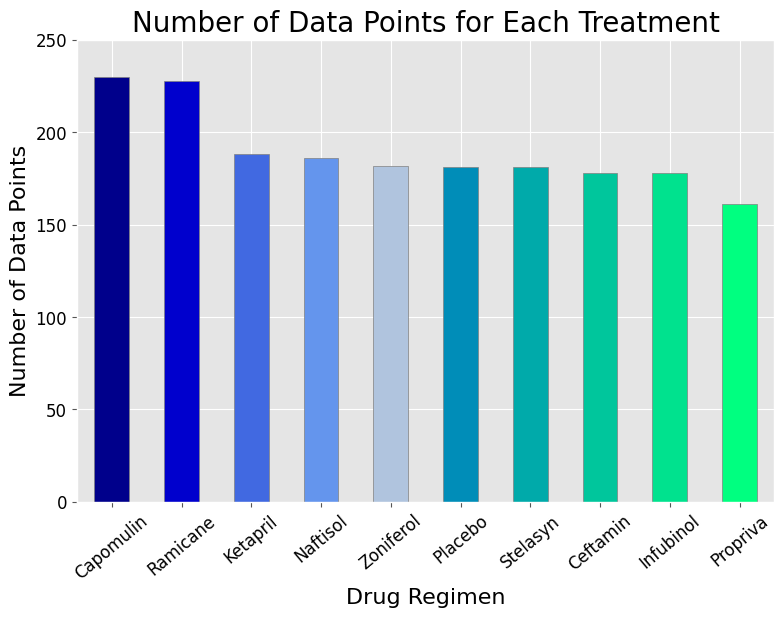

In [6]:
# Create a bar chart using pandas:
data_points_chart_1=d_data_points.plot(kind='bar', figsize=(9, 6), color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=1, edgecolor='gray', align="center")

# Set x-label, y-label, and a title:
data_points_chart_1.set_title('Number of Data Points for Each Treatment',fontsize=20)
data_points_chart_1.set_xlabel('Drug Regimen',fontsize=16, color='black')
data_points_chart_1.set_ylabel("Number of Data Points",fontsize=16, color='black')

# Set tick marks:
for tick in data_points_chart_1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_rotation(40)
    tick.set_color('black')
for tick in data_points_chart_1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color('black')

# Set y limits:
plt.ylim(0, 250)

plt.show()

**Figure 1**

## Matplotlib Bar Plot

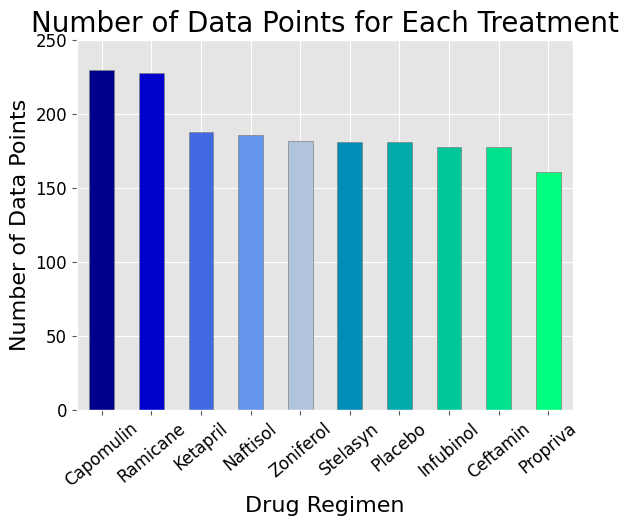

In [7]:
# Create a bar chart using matplotlib:
x_axis = np.arange(len(d_data_points))
data_points_chart_2=plt.bar(x_axis, d_data_points, color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=1, edgecolor='gray',align="center", width=.5)

# Set tick marks for x:
drug_name=['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva'] # Find the way to use df for this step to eliminate manual drug inpt ***start with: drug_name=drr['Drug Regimen'].unique()***
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation=40, color='black', size=12)
plt.yticks(color='black', size=12)

# Set the limits of the y axis:
plt.ylim(0, max(d_data_points)+20)

# Set the limits of the x axis:
plt.xlim(-0.50, len(x_axis)-0.50)

# Set a title, x-label, and y-label:
plt.title('Number of Data Points for Each Treatment',fontsize=20)
plt.xlabel('Drug Regimen',fontsize=16, color='black')
plt.ylabel("Number of Data Points",fontsize=16, color='black')

plt.show()

In [8]:
# Change plot size:
plt.rcParams['figure.figsize']=(9,6)
# Run the above cell again.

## Distribution of Female vs Male Mice in The Study

In [9]:
# Extract total amount of mice in the study by its ID:
total_mouse_count=drr['Mouse ID'].nunique()
#total_mouse_count

# Extract total amount of female mice:
total_female_mice=drr.loc[drr['Sex']=='Female',:].nunique().iloc[0]
#total_female_mice

# Extract total amount of male mice:
total_male_mice=drr.loc[drr['Sex']=='Male',:].nunique().iloc[0]
#total_male_mice

# Percentage of male and female mice in the study:
male_pct=(total_male_mice/total_mouse_count)*100
#male_pct #*****

female_pct=(total_female_mice/total_mouse_count)*100
#female_pct #*****

# Create data frame for female and male mice distribution:
distribution_by_sex_df=pd.DataFrame({
    'Distribution': [male_pct, female_pct]},
    index=['Male','Female'])

#distribution_by_sex_df

## Pandas Pie Chart

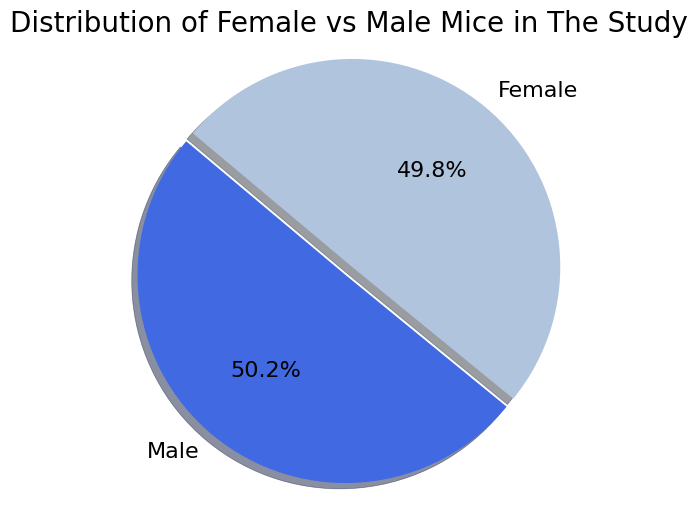

In [10]:
# Create a pie chart for female vs male mice distribution using pandas:
colors=['royalblue','lightsteelblue']
explode=(0,0.05)
pie_1=distribution_by_sex_df.plot(kind="pie", y='Distribution', figsize=(6,6), colors=colors,
                                  startangle=140, explode=explode, shadow=True, fontsize=16,
                                  autopct="%1.1f%%")
pie_1.set_title('Distribution of Female vs Male Mice in The Study', fontsize=20)
pie_1.set_ylabel('')
plt.axis('equal')
plt.legend('',frameon=False)

plt.show()


**Figure 2**

## Matplotlib Pie Chart

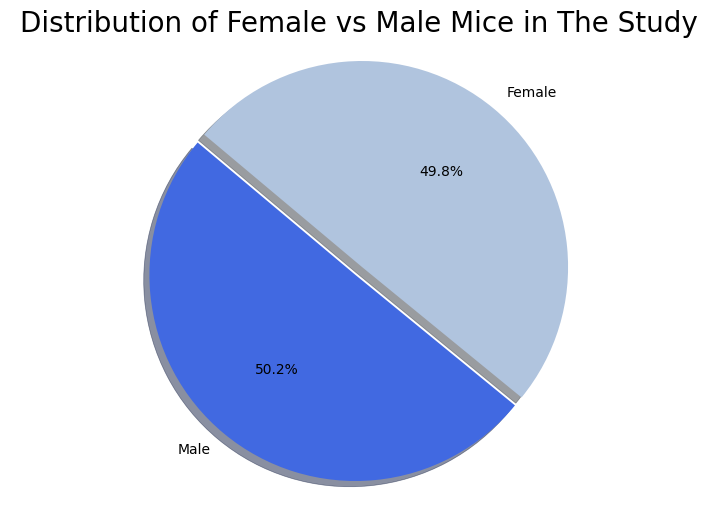

In [11]:
# Create a pie chart for female vs male mice distribution using matplotlib:
explode=(0,0.05)
colors=['royalblue','lightsteelblue']
data=distribution_by_sex_df['Distribution']
pie_2=plt.pie(data, colors=colors, explode=explode, shadow=True, startangle=140,
              labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title('Distribution of Female vs Male Mice in The Study', fontsize=20)
#plt.legend(labels=data.index, loc="best")
plt.axis("equal")
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size']=(16)

plt.show()

# Run this cell 2 times

## Final Tumor Volume of Each Mouse Treated with Capomulin, Ramicane, Infubinol, and Ceftamin

In [12]:
# Extruct columns of interest from original data frame:
new_drr_df=drr[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
#new_drr_df.head(10)

In [13]:
# Sort new dataframe to extract final timepoint for each mouse ID:
sorted_mouseid_timepoint_df=new_drr_df.sort_values(['Mouse ID','Timepoint'], ascending=False) # Sort new dataframe by columns 'Mouse ID' and 'Timepoint'.
sorted_mouseid_timepoint_df

no_dupl_sorted_df=sorted_mouseid_timepoint_df.drop_duplicates(subset='Mouse ID') # Drop duplicates in column 'Mouse ID' to leave only IDs with final timepoints (*** this can be used as well--> df.drop_duplicates(subset='Mouse ID', keep='first')***).
#no_dupl_sorted_df

### Final Tumor Volume of Each Mouse Treated with Capomulin

In [14]:
# Extract final tumor volumes for each mouse treated by Capomulin regimen:
capomulin_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Capomulin']
capomulin_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.159220
440,i557,Capomulin,45,47.685963
204,i738,Capomulin,45,37.311846
337,j119,Capomulin,45,38.125164
317,j246,Capomulin,35,38.753265
380,l509,Capomulin,45,41.483008


**Table 3**

### The Potential Outlier for Capomulin

* The lower quartile of the final tumor volumes for Capomulin: **32.38**

* The upper quartile of the final tumor volumes for Capomulin: **40.16**

* The interquartile range of the final tumor volumes for Capomulin: **7.78**

* The median of the final tumor volumes for Capomulin: **38.13**

* Values below **20.7** may be outliers.

* Values above **51.83** may be outliers.

In [15]:
# Quartile and IQR calculations:
capomulin_vol=capomulin_final_t_vol_df['Tumor Volume (mm3)']

capomulin_quartiles = capomulin_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

#print(f"The lower quartile of the final tumor volumes for Capomulin regimen is: {round(capomulin_lowerq,2)}")
#print(f"The upper quartile of the final tumor volumes for Capomulin regimen is: {round(capomulin_upperq,2)}")
#print(f"The interquartile range of the final tumor volumes for Capomulin regimen is: {round(capomulin_iqr,2)}")
#print(f"The median of the final tumor volumes for Capomulin regimen is: {round(capomulin_quartiles[0.5],2)} ")

# Potential outliers calculation:
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

#print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
#print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")


## Final Tumor Volume of Each Mouse Treated with Ramicane

In [16]:
# Extract final tumor volumes for each mouse treated by Ramicane regimen:
ramicane_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Ramicane']
ramicane_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543
214,a520,Ramicane,45,38.810366
174,a644,Ramicane,45,32.978522
289,c458,Ramicane,30,38.342008
154,c758,Ramicane,45,33.397653
272,d251,Ramicane,45,37.311236
400,e662,Ramicane,45,40.659006
49,g791,Ramicane,45,29.128472
184,i177,Ramicane,45,33.562402


**Table 4**

### The Potential Outliers for Ramicane

* The lower quartile of the final tumor volumes for Ramicane regimen is: **31.56**

* The upper quartile of the final tumor volumes for Ramicane regimen is: **40.66**

* The interquartile range of the final tumor volumes for Ramicane regimen is: **9.1**

* The median of the final tumor volumes for Ramicane regimen is: **36.56**

* Values below **17.9** may be outliers.

* Values above **54.31** may be outliers.

In [17]:
# Quartile and IQR calculations:
ramicane_vol=ramicane_final_t_vol_df['Tumor Volume (mm3)']

ramicane_quartiles = ramicane_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

#print(f"The lower quartile of the final tumor volumes for Ramicane regimen is: {round(ramicane_lowerq,2)}")
#print(f"The upper quartile of the final tumor volumes for Ramicane regimen is: {round(ramicane_upperq,2)}")
#print(f"The interquartile range of the final tumor volumes for Ramicane regimen is: {round(ramicane_iqr,2)}")
#print(f"The median of the final tumor volumes for Ramicane regimen is: {round(ramicane_quartiles[0.5],2)} ")

# Potential outliers calculation:
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

#print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")    
#print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")

### Final Tumor Volume of Each Mouse Treated with Infubinol

In [18]:
# Extract final tumor volumes for each mouse treated by Infubinol regimen:
infubinol_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Infubinol']
infubinol_final_t_vol_df.sort_values(['Mouse ID']).head(10)


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
530,a577,Infubinol,30,57.031862
540,a685,Infubinol,45,66.083066
637,c139,Infubinol,45,72.226731
669,c326,Infubinol,5,36.321346
742,c895,Infubinol,30,60.969711
800,e476,Infubinol,45,62.435404
834,f345,Infubinol,45,60.918767
949,i386,Infubinol,40,67.289621


**Table 5**

### The Potential Outliers for Infubinol

* The lower quartile of the final tumor volumes for Infubinol: **54.05**

* The upper quartile of the final tumor volumes for Infubinol: **65.53**

* The interquartile range of the final tumor volumes for Infubinol: **11.48**

* The median of the final tumor volumes for Infubinol: **60.17**

* Values below **36.83** may be outliers.

* Values above **82.74** may be outliers.


In [33]:
# Quartile and IQR calculations:
infubinol_vol=infubinol_final_t_vol_df['Tumor Volume (mm3)']

infubinol_quartiles = infubinol_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

#print(f"The lower quartile of the final tumor volumes for Infubinol regimen is: {round(infubinol_lowerq,2)}")
#print(f"The upper quartile of the final tumor volumes for Infubinol regimen is: {round(infubinol_upperq,2)}")
#print(f"The interquartile range of the final tumor volumes for Infubinol regimen is: {round(infubinol_iqr,2)}")
#print(f"The median of the final tumor volumes for Infubinol regimen is: {round(infubinol_quartiles[0.5],2)} ")

# Potential outliers calculation:
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

#print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
#print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")


## Final Tumor Volume of Each Mouse treated with Ceftamin

In [34]:
# Extract final tumor volumes for each mouse treated by Ceftamin regimen:
ceftamin_final_t_vol_df=no_dupl_sorted_df[no_dupl_sorted_df['Drug Regimen'] == 'Ceftamin']
ceftamin_final_t_vol_df.sort_values(['Mouse ID']).head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
594,b447,Ceftamin,0,45.000000
600,b487,Ceftamin,25,56.057749
617,b759,Ceftamin,30,55.742829
840,f436,Ceftamin,15,48.722078
940,h531,Ceftamin,5,47.784682
993,j296,Ceftamin,45,61.849023
1033,k210,Ceftamin,45,68.923185
1112,l471,Ceftamin,45,67.748662
1119,l490,Ceftamin,30,57.918381


**Table 6**

### Potential Outlier for Ceftamin

* The lower quartile of the final tumor volumes for Ceftamin: **48.72**

* The upper quartile of the final tumor volumes for Ceftamin: **64.3**

* The interquartile range of the final tumor volumes for Ceftamin: **15.58**

* The median of the final tumor volumes for Ceftamin: **59.85**

* Values below **25.36** may be outliers.

* Values above **87.67** may be outliers.

In [35]:
# Quartile and IQR calculations:
ceftamin_vol=ceftamin_final_t_vol_df['Tumor Volume (mm3)']

ceftamin_quartiles = ceftamin_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

#print(f"The lower quartile of the final tumor volumes for Ceftamin regimen is: {round(ceftamin_lowerq,2)}")
#print(f"The upper quartile of the final tumor volumes for Ceftamin regimen is: {round(ceftamin_upperq,2)}")
#print(f"The interquartile range of the final tumor volumes for Ceftamin regimen is: {round(ceftamin_iqr,2)}")
#print(f"The median of the final tumor volumes for Ceftamin regimen is: {round(ceftamin_quartiles[0.5],2)} ")

# Potential outliers calculation:
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

#print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
#print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")

## Potential Outliers of The Final Tumor Volumes For All Four Treatment Regimens

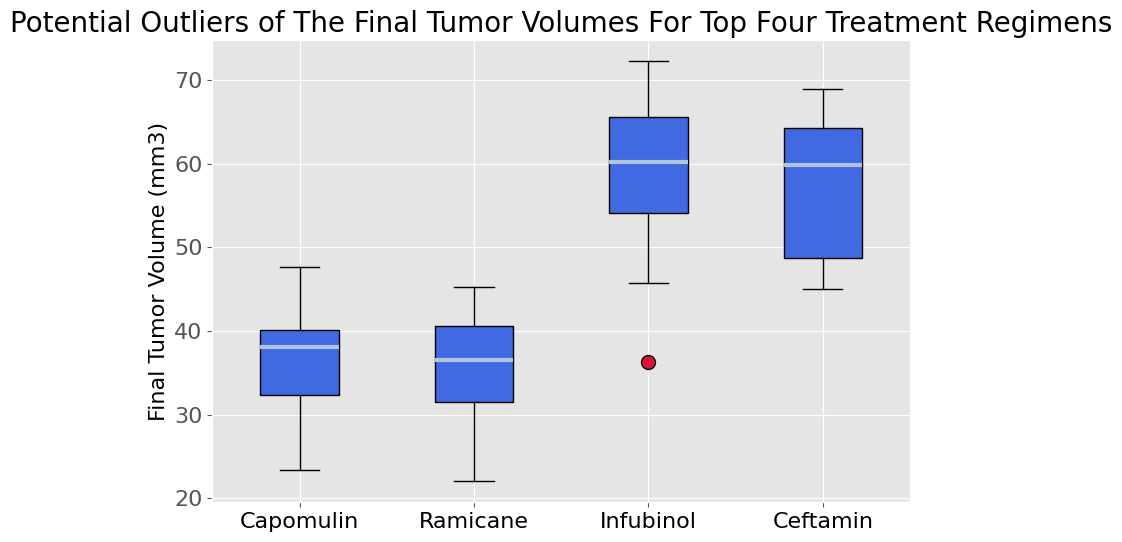

In [36]:
# Final tumor volumes data for 4 top treatments:
capomulin_vol=capomulin_final_t_vol_df['Tumor Volume (mm3)']
ramicane_vol=ramicane_final_t_vol_df['Tumor Volume (mm3)']
infubinol_vol=infubinol_final_t_vol_df['Tumor Volume (mm3)']
ceftamin_vol=ceftamin_final_t_vol_df['Tumor Volume (mm3)']

# Combine final tumor volumes data for 4 top treatments into a list: 
volumes=[capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

# Outliers plot of the final tumor volumes:
fig, ax=plt.subplots(1, figsize=(9, 6))
bp=ax.boxplot(volumes, patch_artist=True)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=16, color='black')

# Change fill color:
for box in bp['boxes']:
    box.set(facecolor='royalblue')

# Change color and linewidth of the medians:
for median in bp['medians']:
    median.set(color='lightsteelblue', linewidth=3)

# Change the fill and style of fliers:
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='crimson', alpha=1)

plt.show()

**Figure 3**

## Tumor Volume Change over Period of Study of a Random Mouse Treated with Capomulin

In [37]:
# Extracting data for a target mouse treated with Capomulin:
target_mouse_sorted=sorted_mouseid_timepoint_df.loc[sorted_mouseid_timepoint_df['Mouse ID']=='s185',:]
target_mouse=target_mouse_sorted.sort_values('Timepoint')
#target_mouse

# Redusing dataframe to columns 'Timepoint' and 'Tumor Volume (mm3)':
target_mouse_plot=target_mouse[['Timepoint','Tumor Volume (mm3)']]
#target_mouse_plot

# Change index to timepoints:
target_mouse_plot=target_mouse_plot.set_index('Timepoint')
#target_mouse_plot

### Change of Tumor Volume over Period of Study for Mouse ID s185 Treated with Capomulin

Text(0.5, 0, 'Timepoint')

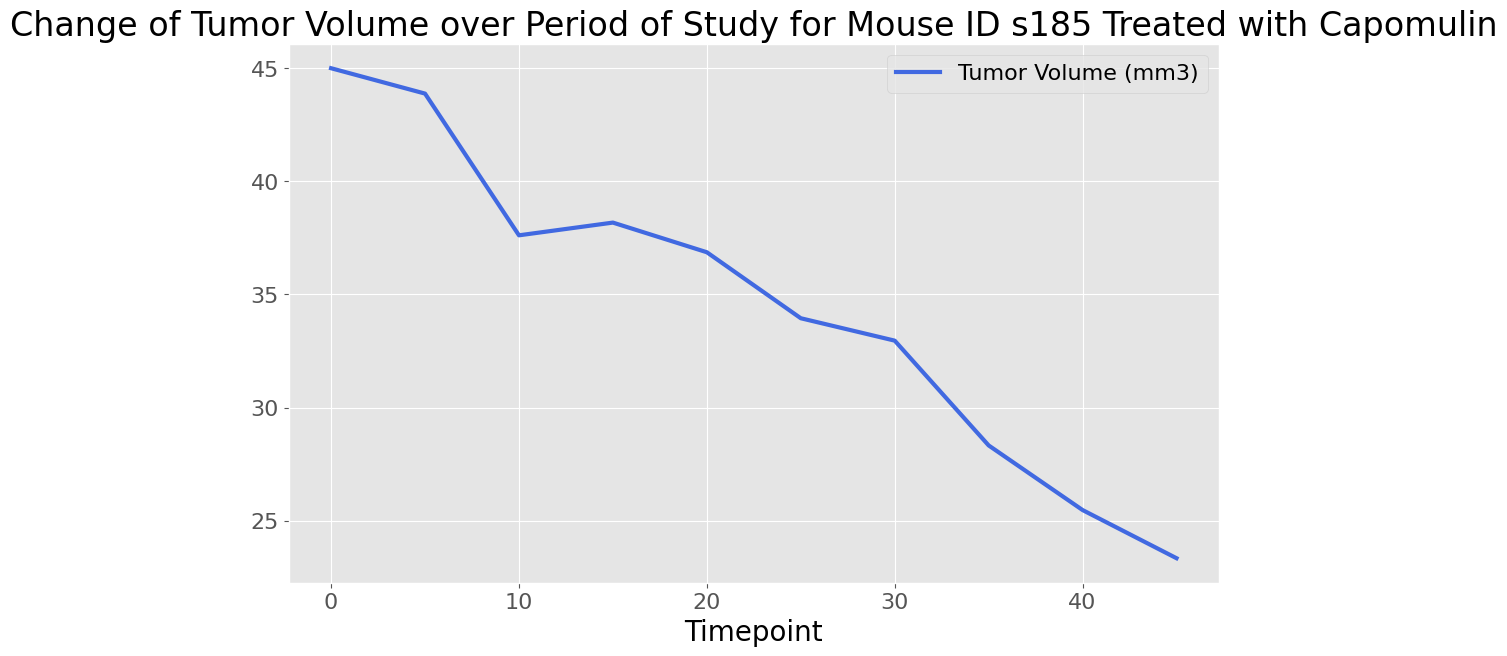

In [38]:
# Plot the chart:
target_mouse_plot.plot(linewidth=3, color='royalblue', figsize=(12, 7))

# Set x-label, y-label, and a title:
plt.title('Change of Tumor Volume over Period of Study for Mouse ID s185 Treated with Capomulin', fontsize=24)
plt.xlabel('Timepoint', fontsize=20, color='black')

**Figure 4**

## Mouse Weight vs Average Tumor Volume for The Capomulin Treatment Regimen

In [39]:
# Extruct columns of interest from original data frame:
new_drr2_df=drr[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
#new_drr2_df.head(10)

# Extract Capomulin data only:
capomulin_weight_df=new_drr2_df[new_drr2_df['Drug Regimen'] == 'Capomulin']
#capomulin_weight_df

# Calculate tumor volume average for each mouse:
av_t_vol=capomulin_weight_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#av_t_vol

# Reset index for new data:
av_t_vol=av_t_vol.reset_index()
#av_t_vol

# Rename 'Tumor Volume (mm3)' column:
av_t_vol=av_t_vol.rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})
#av_t_vol #*****

# Extract columns of interest and remove duplicates:
capomulin_weight2_df=capomulin_weight_df[['Mouse ID', 'Weight (g)']].drop_duplicates(subset='Mouse ID')
#capomulin_weight2_df #*****

# Merge data frame with mouse weight and data frame with avg tumor volume into a single dataset and sort by mouse ID:
mouse_avg_t_vol_weight_df=pd.merge(capomulin_weight2_df, av_t_vol, on="Mouse ID")
mouse_avg_t_vol_weight_df.sort_values('Mouse ID').head()

,Mouse ID,Weight (g),Avg Tumor Volume (mm3)
14,b128,22,41.963636
13,b742,21,40.083699
3,f966,17,36.505973
11,g288,19,41.990097
19,g316,22,44.613344


**Table 7**

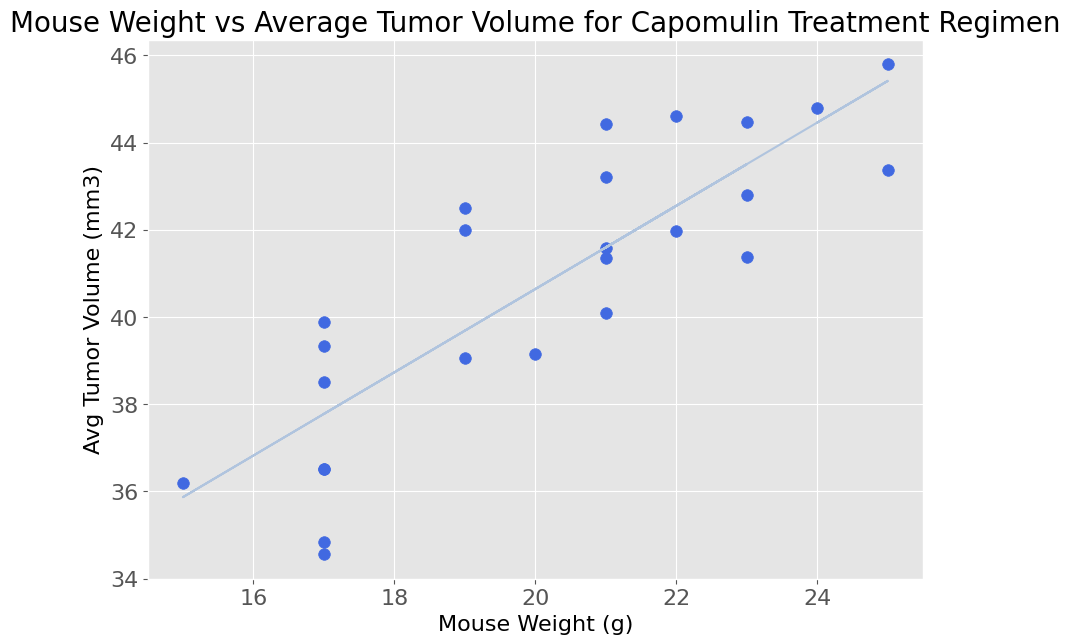

In [40]:
# Generate a scatter plot of mouse weight vs average tumor volume for the Capomulin treatment regimen:
plt.figure(figsize=(10,7))
plt.scatter(mouse_avg_t_vol_weight_df.iloc[:,1],mouse_avg_t_vol_weight_df.iloc[:,2], color='royalblue', s=[70], alpha=1)
plt.xlabel('Mouse Weight (g)', fontsize=16, color='black')
plt.ylabel('Avg Tumor Volume (mm3)', fontsize=16, color='black')
#size=[70]
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment Regimen', fontsize=20)

# Add the linear regression equation and line to plot:
x_values=mouse_avg_t_vol_weight_df['Weight (g)']
y_values=mouse_avg_t_vol_weight_df['Avg Tumor Volume (mm3)']
(slope, intercept,  rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,'lightsteelblue')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f'Linear regression equation: {line_eq}')

plt.show()
#plt.savefig('pic.png', dpi=80)

**Figure 5**

* The correlation between both is 0.84

* Linear regression equation: y= 0.95x + 21.55

In [41]:
# Computing the Pearson correlation coefficient between "Mouse Weight" and "Avg Tumor Volume":
mouse_weight=mouse_avg_t_vol_weight_df.iloc[:,1]
volume=mouse_avg_t_vol_weight_df.iloc[:,2]
correlation = sts.pearsonr(mouse_weight,volume)

#print(f"The correlation between both factors is {round(correlation[0],2)}")